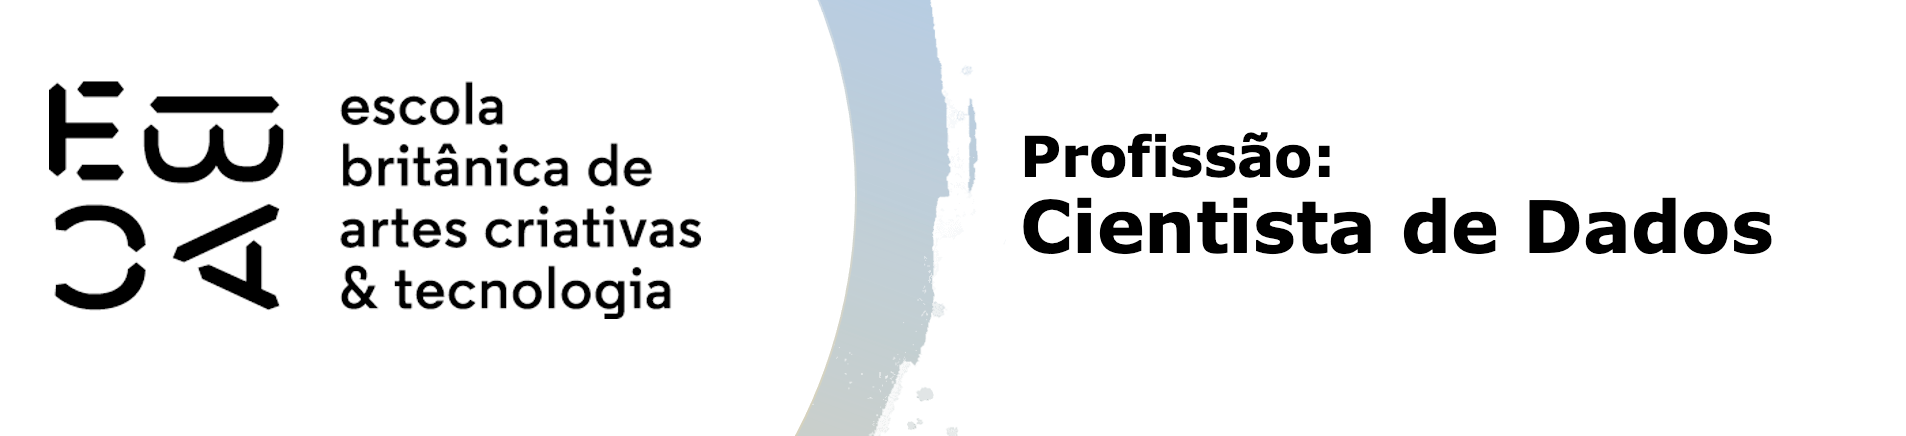

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px - Tentei usar mas plotou em branco  :<

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [3]:
# Filtrando apenas dados de 2020 para frente
df_2020 = df[df['Ano']>=2020]
df_2020

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
100702,64.963.044/0001-08,FARMACLUB DROGARIAS LTDA,3114110,2020-06-30,179.55,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100703,00.776.574/0022-80,B2W Companhia Digital,9344628,2020-06-30,63.38,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100704,13.986.197/0002-02,LOJA ELECTROLUX COM VIRTUAL DE ELET,387412,2020-06-30,396.41,2020-06-30,0.0,Liberado,2020,1,0.0,0,não definido
100705,61.585.865/0703-62,RAIADROGASIL S/A,8121,2020-06-30,53.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Farmácia
100706,15.436.940/0003-67,AMAZON SERVICOS DE VAREJO DO BRASIL LTDA,5889036,2020-06-30,32.90,2020-06-30,0.0,Liberado,2020,1,0.0,0,Varejo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187641,22.172.203/0004-40,B.BLEND MAQUINAS E BEBIDAS S. A.,180264,2021-01-07,252.84,2021-01-07,0.0,Liberado,2021,2,0.0,0,não definido
187642,71.676.316/0005-70,SUPERMERCADOS MAMBO LTDA.,348953,2021-01-07,373.65,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado
187643,61.585.865/0240-93,RAIADROGASIL S/A,190447,2021-01-07,130.71,2021-01-07,0.0,Liberado,2021,2,0.0,0,Farmácia
187644,67.616.128/0001-55,AYUMI SUPERMERCADOS LTDA - 1,51004,2021-01-07,43.16,2021-01-07,0.0,Liberado,2021,2,0.0,0,Mercado


In [4]:
# Verificando proporções gerais
cred_positivo = df_2020[df['flag_credito']==1]
cred_negativo = df_2020[df['flag_credito']==0]
cred_positivo_shape = df_2020[df['flag_credito']==1].shape[0]
cred_negativo_shape = df_2020[df['flag_credito']==0].shape[0]
cred_total = df_2020.shape[0]

print(f"Total de NFP positivas: {cred_positivo_shape}")
print(f"Proporção de NFP positivas: {cred_positivo_shape/cred_total}")
print("\n")
print(f"Total de NFP sem valor: {cred_negativo_shape}")
print(f"Proporção de NFP sem valor: {cred_negativo_shape/cred_total}")

Total de NFP positivas: 37318
Proporção de NFP positivas: 0.4292188075082812


Total de NFP sem valor: 49626
Proporção de NFP sem valor: 0.5707811924917188


C:\Users\Bill_\AppData\Local\Temp\ipykernel_3516\885156456.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cred_positivo = df_2020[df['flag_credito']==1]
C:\Users\Bill_\AppData\Local\Temp\ipykernel_3516\885156456.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cred_negativo = df_2020[df['flag_credito']==0]
C:\Users\Bill_\AppData\Local\Temp\ipykernel_3516\885156456.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cred_positivo_shape = df_2020[df['flag_credito']==1].shape[0]
C:\Users\Bill_\AppData\Local\Temp\ipykernel_3516\885156456.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cred_negativo_shape = df_2020[df['flag_credito']==0].shape[0]


In [5]:
# Verificando os tipos de categorias existentes
df_2020['categoria'].unique()

array(['Farmácia', 'não definido', 'Varejo', 'Mercado', 'Restaurantes',
       'Construção', 'Alimentos', 'Vestuário', 'Auto posto'], dtype=object)

In [6]:
# Criando um conjunto para deixar em ordem decrescente
contagem_categorias = cred_positivo['categoria'].value_counts()
# Ordenar as categorias pela contagem, do maior para o menor
contagem_categorias = contagem_categorias.sort_values(ascending=False)
contagem_categorias

Mercado         13177
Construção       7523
não definido     6689
Farmácia         3582
Alimentos        3442
Restaurantes     1626
Varejo            701
Vestuário         443
Auto posto        135
Name: categoria, dtype: int64

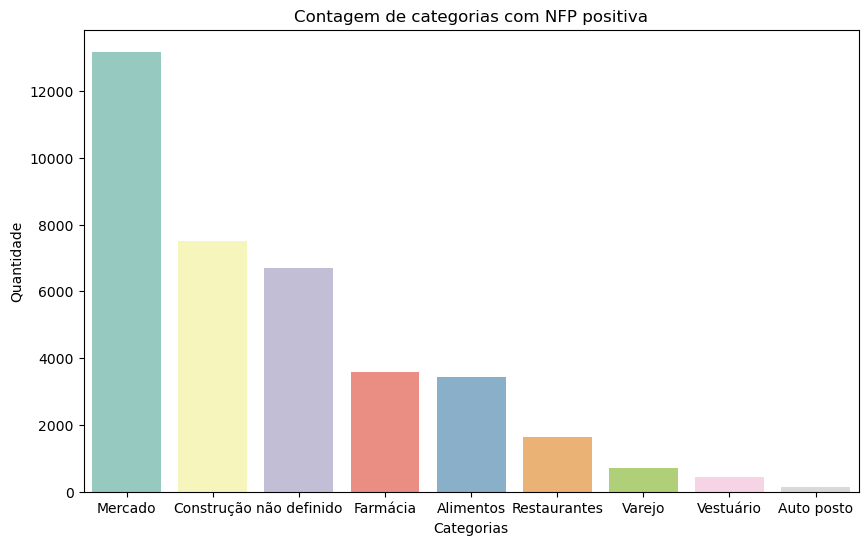

In [7]:
# Tamanho da afigura (largura e altura)
plt.figure(figsize=(10, 6))
# Gráfico de contagem barras
sns.countplot(data=cred_positivo, x='categoria', order=contagem_categorias.index, palette=sns.color_palette("Set3"))


# Titulos
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.title('Contagem de categorias com NFP positiva')

plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

### Calculando WOE com uso de crosstab e odds, odds ratio

In [8]:
df_cross = df_2020[['categoria', 'flag_credito']]

# Crosstab entre 'categoria' e 'flag_credito', incluindo margens para calcular os totais
crosstab_df = pd.crosstab(df_cross['categoria'], df_cross['flag_credito'], margins=True)

# Renomear a última linha e última coluna para 'total'
crosstab_df = crosstab_df.rename(index={'All': 'total'}, columns={'All': 'total'})

# Criando a coluna odds, que é a divisão do evento pelo não evento
crosstab_df['odds'] = crosstab_df[1] / crosstab_df[0]

# Criando a coluna odds_ratio, divisão de cada valor de odds pelo odds do total
crosstab_df['odds_ratio'] = crosstab_df['odds'] / crosstab_df.loc['total', 'odds']

# Criando coluna woe weight of evidence, que é o log de cada valor de odds ratio
crosstab_df['woe'] = np.log(crosstab_df['odds_ratio'])


crosstab_df

flag_credito,0,1,total,odds,odds_ratio,woe
categoria,,,,,,
Alimentos,1605,3442,5047,2.144548,2.851850,1.047968
Auto posto,404,135,539,0.334158,0.444369,-0.811101
Construção,8523,7523,16046,0.882670,1.173788,0.160236
Farmácia,6604,3582,10186,0.542399,0.721289,-0.326715
Mercado,14379,13177,27556,0.916406,1.218649,0.197743
Restaurantes,552,1626,2178,2.945652,3.917170,1.365369
Varejo,4365,701,5066,0.160596,0.213562,-1.543826
Vestuário,1477,443,1920,0.299932,0.398854,-0.919159
não definido,11717,6689,18406,0.570880,0.759164,-0.275537


### Calculando WOE usando DataFrame e porcentagens

#### Apesar do código ter ficado mais longo, gostei mais dessa maneira de se fazer, me pareceu mais intuitivo e facil de entender as etapas.

In [11]:
# Criano dois panda series para cada tipo da NFPaulista, 1 positivo e 0 que não tem dindin
contagem_categorias_1 = cred_positivo['categoria'].value_counts()
contagem_categorias_0 = cred_negativo['categoria'].value_counts()

# Reindexar contagem_categorias_1 com base nos índices de contagem_categorias_0
contagem_categorias_1 = contagem_categorias_1.reindex(contagem_categorias_0.index, fill_value=0)

# Criando um DataFrame combinando os dois panda series acima
df_table_stats = pd.DataFrame({'Categoria': contagem_categorias_0.index,
                   '0': contagem_categorias_0.values,
                   '1': contagem_categorias_1.values})

# Criando  coluna total, que é  soma da coluna 0 e 1
df_table_stats['total'] = df_table_stats['0'] + df_table_stats['1']

# Calcular o total para as colunas '0', '1' e 'total'
total_0 = df_table_stats['0'].sum()
total_1 = df_table_stats['1'].sum()
total = df_table_stats['total'].sum()
df_table_stats.loc['total'] = ['Total', total_0, total_1, total]

# Criando a coluna pct_0, que é a porcentagem da coluna 0 pelo seu total
df_table_stats['pct_0'] = df_table_stats['0'] / df_table_stats.loc['total', '0']

# Criando a coluna pct_1, que é a porcentagem da coluna 1 pelo seu total
df_table_stats['pct_1'] = df_table_stats['1'] / df_table_stats.loc['total', '1']

# Criando a coluna razão de chance, que é a porcentagem do evento dividido pela porcentagem de não evento
df_table_stats['rc'] = df_table_stats['pct_1'] / df_table_stats['pct_0']

# Criando a coluna weight of evidence, que é o logaritimo da divisão das porcentagens de evento e não evento
df_table_stats['woe'] = np.log(df_table_stats['rc'])


df_table_stats

,Categoria,0,1,total,pct_0,pct_1,rc,woe
0,Mercado,14379,13177,27556,0.289747,0.353100,1.218649,0.197743
1,não definido,11717,6689,18406,0.236106,0.179243,0.759164,-0.275537
2,Construção,8523,7523,16046,0.171745,0.201592,1.173788,0.160236
3,Farmácia,6604,3582,10186,0.133075,0.095986,0.721289,-0.326715
4,Varejo,4365,701,5066,0.087958,0.018785,0.213562,-1.543826
5,Alimentos,1605,3442,5047,0.032342,0.092234,2.851850,1.047968
6,Vestuário,1477,443,1920,0.029763,0.011871,0.398854,-0.919159
7,Restaurantes,552,1626,2178,0.011123,0.043571,3.917170,1.365369
8,Auto posto,404,135,539,0.008141,0.003618,0.444369,-0.811101
total,Total,49626,37318,86944,1.000000,1.000000,1.000000,0.000000


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [12]:
# Calculando o information value parcial de cada categoria
df_table_stats['iv_parcial'] = df_table_stats['woe'] * (df_table_stats['pct_1'] - df_table_stats['pct_0'])

df_table_stats

,Categoria,0,1,total,pct_0,pct_1,rc,woe,iv_parcial
0,Mercado,14379,13177,27556,0.289747,0.353100,1.218649,0.197743,0.012528
1,não definido,11717,6689,18406,0.236106,0.179243,0.759164,-0.275537,0.015668
2,Construção,8523,7523,16046,0.171745,0.201592,1.173788,0.160236,0.004783
3,Farmácia,6604,3582,10186,0.133075,0.095986,0.721289,-0.326715,0.012118
4,Varejo,4365,701,5066,0.087958,0.018785,0.213562,-1.543826,0.106792
5,Alimentos,1605,3442,5047,0.032342,0.092234,2.851850,1.047968,0.062765
6,Vestuário,1477,443,1920,0.029763,0.011871,0.398854,-0.919159,0.016445
7,Restaurantes,552,1626,2178,0.011123,0.043571,3.917170,1.365369,0.044304
8,Auto posto,404,135,539,0.008141,0.003618,0.444369,-0.811101,0.003669
total,Total,49626,37318,86944,1.000000,1.000000,1.000000,0.000000,0.000000


In [14]:
# Somatoria das parciais e resultado final do information value
information_value = df_table_stats['iv_parcial'].sum()
information_value

0.27907087937795494

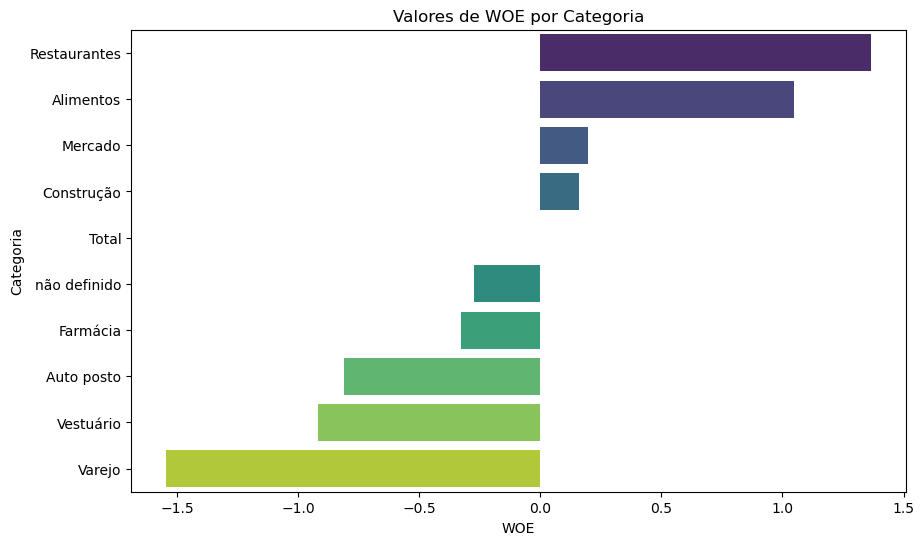

In [15]:
# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='woe', y='Categoria', data=df_table_stats.sort_values(by='woe', ascending=False), palette='viridis')

# Adicionando título e rótulos dos eixos
plt.title('Valores de WOE por Categoria')
plt.xlabel('WOE')
plt.ylabel('Categoria')

# Mostrando o gráfico
plt.show()

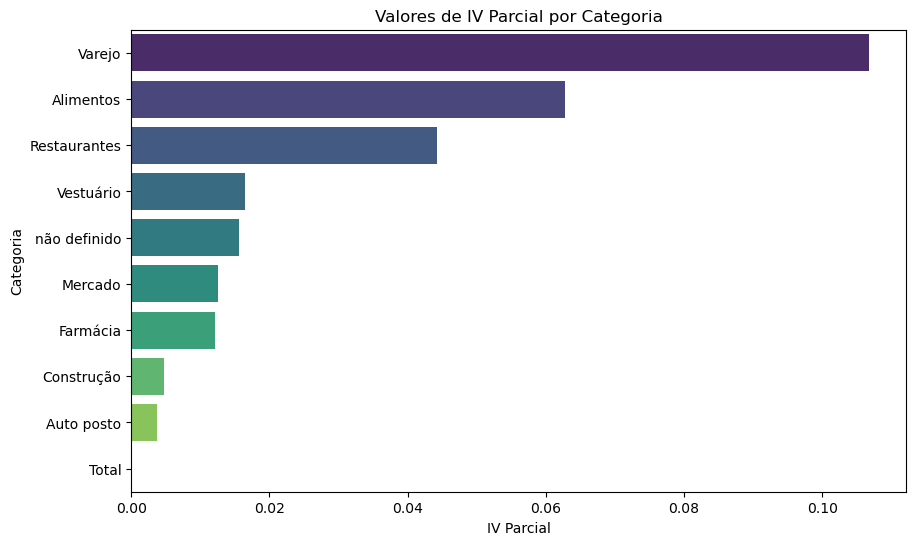

In [20]:
# Criando o gráfico com Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='iv_parcial', y='Categoria', data=df_table_stats.sort_values(by='iv_parcial', ascending=False), palette='viridis')

# Adicionando título e rótulos dos eixos
plt.title('Valores de IV Parcial por Categoria')
plt.xlabel('IV Parcial')
plt.ylabel('Categoria')

# Mostrando o gráfico
plt.show()

## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


In [29]:
# Comparação do calculo do IV do restaurando e alimentos, para entender a grandeza do IV
r = 0.043571 - 0.011123
print(r)
r = r * 1.365369
print(r)

print('\n')

a = 0.092234 - 0.032342	
print(a)
a = 1.047968 * a
print(a)

0.032448
0.044303493312


0.059891999999999994
0.062764899456


#### A diferença proporcional entre cada categoria foi um dos grandes fatores para o calculo da importância de cada uma delas, como o restaurante que tem um woe de 1.36 e um rc de 3.91, o que indica que é 3.91 vezes maior que o não evento, ou como o varejo que mostra que o não evento é 78% maior (1-0.213562), sendo de longe a categoria que mais explica uma diferença de evento para não evento.
<br>

#### Porém essa diferença da proporção de eventos para não eventos não é o único fator, foi muito curioso ver que no gráfico de IV alimentos passam a ter um valor maior que o restaurantes, pois o IV não leva em consideração só a diferença proporcional, mas também a diferença direta multiplicada pela diferença proporcional. 
<br>

#### O gráfico de WOE ficou muito bom para diferenciar as categorias que explicam o evento e também as melhores categorias para explicar o não evento, sendo ambas muito importântes. Já o gráfico de IV ajudou a unir os valores positivos e negativos e ter uma noção melhor da grandeza do quanto cada categoria explica. 